In [2]:
import sys
sys.path.append('../src')
from models import SentimentModelTrainer
import pandas as pd

In [3]:
final_data = pd.read_csv('../data/processed/feature_dataset.csv')

In [4]:
print(final_data['sentiment_category'].value_counts(normalize=True))

sentiment_category
positive    0.787118
neutral     0.157285
negative    0.055597
Name: proportion, dtype: float64


In [3]:
trainer = SentimentModelTrainer()

In [4]:
trainer.preparing_data(final_data)

Preparing data for training...
Training set size: 17339
Test set size: 4335
Class distribution in training
sentiment_category
positive    13648
neutral      2727
negative      964
Name: count, dtype: int64


In [5]:
trainer.define_the_models()

Defined 5 baseline models


In [6]:
trainer.train_and_evaluate_models()


Training Logistic Regression
CV Accuracy: 0.84203 (+/- 0.01077)
Accuracy Score: 0.8401384083044983
F1 Score (weighted average): 0.8107603128696703

Training Navie Bayes
CV Accuracy: 0.79595 (+/- 0.00311)
Accuracy Score: 0.7983852364475201
F1 Score (weighted average): 0.7193243917770928

Training Linear Support Vector
CV Accuracy: 0.84128 (+/- 0.00631)
Accuracy Score: 0.8385236447520185
F1 Score (weighted average): 0.8176074001186994

Training Gradient Boosting
CV Accuracy: 0.83159 (+/- 0.00686)
Accuracy Score: 0.8269896193771626
F1 Score (weighted average): 0.7800779614730003

Training Voting Hard


c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ltolu\OneDrive\Desktop\ice-cream_sentiment_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.


CV Accuracy: 0.83252 (+/- 0.00653)
Accuracy Score: 0.8295271049596309
F1 Score (weighted average): 0.784112518896057


In [7]:
comparison_df = trainer.comparing_models()


			MODEL COMPARISON RESULTS
                Model  CV_Mean   CV_STD  Test_Accuracy  Test_F1  Training_Time  Inference_Time  Time_Taken
Linear Support Vector 0.841283 0.003155       0.838524 0.817607         3.5354          0.5102     4.04559
  Logistic Regression 0.842032 0.005385       0.840138 0.810760         3.2810          0.4421     3.72312
          Voting Hard 0.832516 0.003263       0.829527 0.784113       105.9276          0.4551   106.38266
    Gradient Boosting 0.831594 0.003428       0.826990 0.780078        45.0001          0.3732    45.37324
          Navie Bayes 0.795951 0.001555       0.798385 0.719324         1.7194          0.4814     2.20076



Analysis of the model: Linear Support Vector


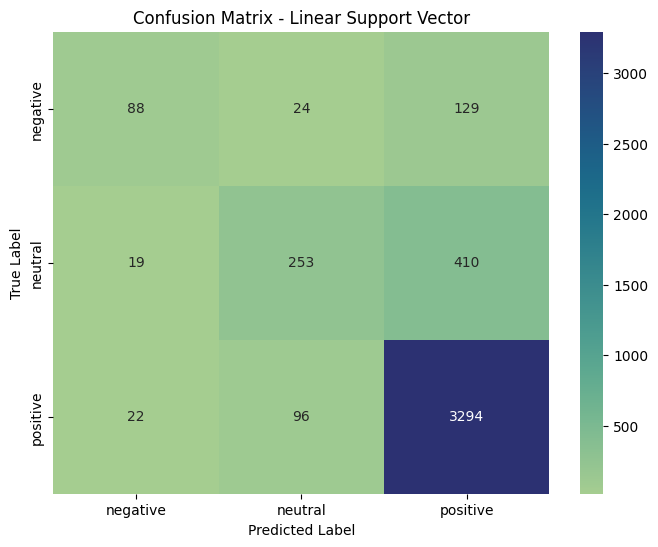

In [8]:
best_model, best_result = trainer.analyze_best_models()

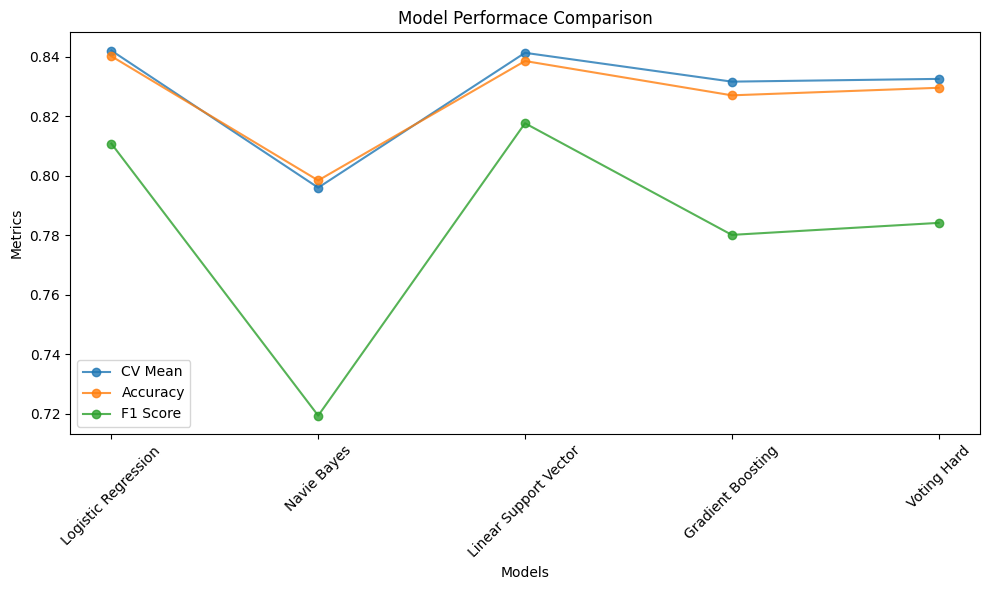

In [9]:
trainer.plot_model_comparison()

In [10]:
best_optimized_model, best_params, optimized_accuracy = trainer.optimize_best_model(best_model)

Optimizing Linear Support Vector
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'classifier__C': 1, 'classifier__max_iter': 100}
Optimized accuracy 0.839
Improvement: 0.00000


In [11]:
trainer.analyze_features_importance(best_optimized_model, best_model)


Feature Importance Analysis for Linear Support Vector
Top 20 Important Features:
lime: 3.0239
java: 2.8693
heath: 2.7216
toffee: 2.4187
blueberry: 2.4019
cannoli: 2.2716
peach: 2.1577
bourbon: 2.0424
blondie: 1.9560
malt: 1.9387
costco: 1.8803
tahitian: 1.7999
liqueur: 1.7893
blonde: 1.7718
pretzels: 1.7543
raisins: 1.7075
pretzel: 1.5907
brownies: 1.5477
truffles: 1.5203
square: 1.4994


In [12]:
trainer.test_model_on_examples(best_optimized_model)


Testing model on example reviews:
Review: Super good, don't get me wrong. But I came for the caramel and brownies, not the sweet cream. The taste of this was amazing, but the ratio of brownie to sweet cream was disappointing. Liked it regardless but probably won't buy again simply because it didn't live up to its promising package. I'll find another one that has a better ratio and wayyy more yummy chewy brownies. Overall, good flavor, texture, idea, and brownies.
Prediction: neutral
------------------------------


In [13]:
comparison_df.to_csv('../results/model_comparison.csv', index=False)
print("\nResults saved to '../results/model_comparion.csv'")


Results saved to '../results/model_comparion.csv'


In [14]:
import joblib
joblib.dump(best_optimized_model, '../models/final_sentiment_model.pkl')
print("Final model saved")

Final model saved


In [ ]:
model_docs = {
    'model_type': best_model,
    'test_accuracy': optimized_accuracy,
    'best_parameters': best_params,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
    'features_used': 'TF-IDF (5000 features) + text statistics',    #is it possible to change this?
    'classes': ['negative', 'neutral', 'positive']
}

In [16]:
import json
with open('../models/model_documentation.json', 'w') as f:
    json.dump(model_docs, f, indent=2)